# Library Imports

In [1]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV,LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
import math
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score, f1_score, confusion_matrix,precision_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedKFold
from scipy.stats import skew
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [2]:
df = pd.read_csv('train12.csv')

# Data Exploration and Preprocessing

In [3]:
df.head()

,Unnamed: 0,id,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,RATE_owner_2,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,...,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
0,900,4813,606.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,606.0,A,150000.0,100.0,4642.0,Paid off with renewal
1,329,1406,703.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,107027.25,NaN,preferred,NaN,703.0,A,150000.0,100.0,1362.0,Paid in full
2,1035,7415,692.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,692.0,A,150000.0,100.0,6485.0,Default
3,1670,6759,684.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,684.0,A,150000.0,100.0,6035.0,Paid via discounted payoff
4,1726,5867,625.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,625.0,A,150000.0,100.0,5299.0,Paid in full


In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(1810, 56)

In [6]:
df.dtypes

Unnamed: 0                                    int64
id                                            int64
owner_1_score                               float64
RATE_owner_1                                 object
CAP_AMOUNT_owner_1                          float64
PERCENT_OWN_owner_1                         float64
owner_2_score                               float64
RATE_owner_2                                 object
CAP_AMOUNT_owner_2                          float64
PERCENT_OWN_owner_2                         float64
owner_3_score                               float64
RATE_owner_3                                 object
CAP_AMOUNT_owner_3                          float64
PERCENT_OWN_owner_3                         float64
years_in_business                           float64
RATE_ID_FOR_years_in_business                object
fsr                                         float64
RATE_ID_FOR_fsr                              object
location                                     object
RATE_ID_FOR_

Looking for nulls percentage

In [7]:
null_percentage = df.isnull().sum() / len(df) * 100

for col, percentage in null_percentage.items():
    print(f'{col}: {percentage:.2f} %')
    print('-' * 40)

Unnamed: 0: 0.00 %
----------------------------------------
id: 0.00 %
----------------------------------------
owner_1_score: 1.33 %
----------------------------------------
RATE_owner_1: 1.66 %
----------------------------------------
CAP_AMOUNT_owner_1: 1.93 %
----------------------------------------
PERCENT_OWN_owner_1: 0.94 %
----------------------------------------
owner_2_score: 88.18 %
----------------------------------------
RATE_owner_2: 88.18 %
----------------------------------------
CAP_AMOUNT_owner_2: 88.84 %
----------------------------------------
PERCENT_OWN_owner_2: 85.69 %
----------------------------------------
owner_3_score: 99.45 %
----------------------------------------
RATE_owner_3: 99.45 %
----------------------------------------
CAP_AMOUNT_owner_3: 99.45 %
----------------------------------------
PERCENT_OWN_owner_3: 97.68 %
----------------------------------------
years_in_business: 0.88 %
----------------------------------------
RATE_ID_FOR_years_in_busine

Dropping features that have more than 60% nulls

In [8]:
def drop_null_columns(df, threshold=0.6):
    
    null_percentages = df.isnull().sum() / len(df)
    drop_columns = null_percentages[null_percentages > threshold].index
    df = df.drop(columns=drop_columns)
    
    return df

df=drop_null_columns(df)

In [9]:
null_percentage = df.isnull().sum() / len(df) * 100

for col, percentage in null_percentage.items():
    print(f'{col}: {percentage:.2f} %')
    print('-' * 40)

Unnamed: 0: 0.00 %
----------------------------------------
id: 0.00 %
----------------------------------------
owner_1_score: 1.33 %
----------------------------------------
RATE_owner_1: 1.66 %
----------------------------------------
CAP_AMOUNT_owner_1: 1.93 %
----------------------------------------
PERCENT_OWN_owner_1: 0.94 %
----------------------------------------
years_in_business: 0.88 %
----------------------------------------
RATE_ID_FOR_years_in_business: 0.88 %
----------------------------------------
fsr: 27.35 %
----------------------------------------
location: 0.61 %
----------------------------------------
RATE_ID_FOR_location: 4.09 %
----------------------------------------
funded_last_30: 0.00 %
----------------------------------------
judgement_lien_percent: 0.00 %
----------------------------------------
RATE_ID_FOR_judgement_lien_percent: 0.00 %
----------------------------------------
INPUT_VALUE_ID_FOR_judgement_lien_amount: 0.00 %
-----------------------------

Splitting the dataset into categorical and numerical features

In [10]:
categorical = []
numerical = []

for col in df.columns:
    if df[col].dtypes == 'object':
        categorical.append(col)
    else:
        numerical.append(col)

Splitting numerical features to continous and discrete

In [11]:
continuous_cols = []
discrete_cols = []
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        if len(df[col].unique()) > 20:
            continuous_cols.append(col)
        else:
            discrete_cols.append(col)

Plotting a countplot for all categorical features

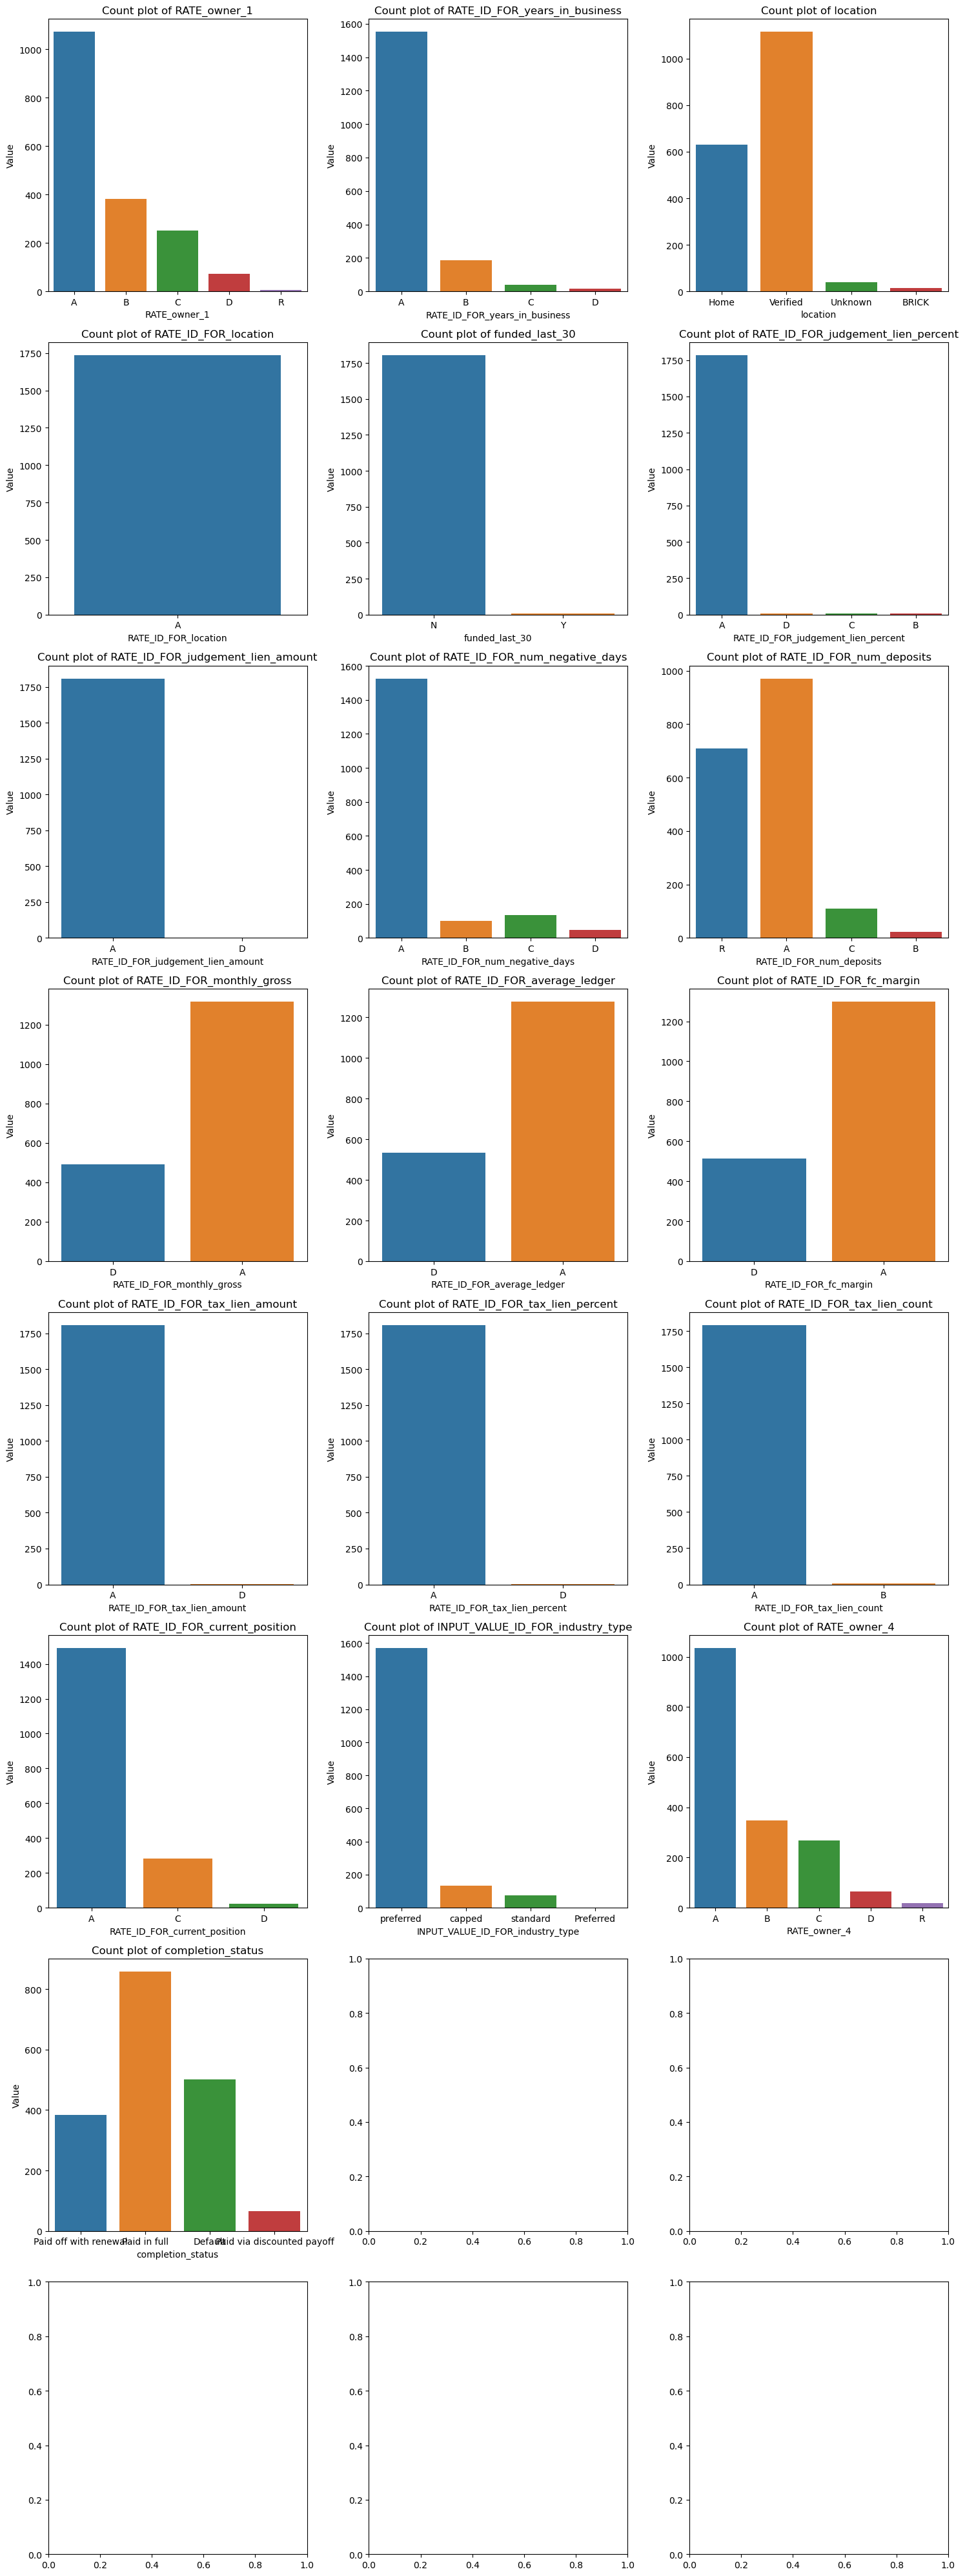

In [12]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(15,40))

for i, col in enumerate(categorical):
    sns.countplot(x=col, data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Count plot of {col}')
    axes[i//3, i%3].set_xlabel(col)
    axes[i//3, i%3].set_ylabel('Value')

plt.tight_layout()
plt.show()

Looking for the rest of the nulls to deal with them

In [13]:
df.isnull().sum()

Unnamed: 0                                    0
id                                            0
owner_1_score                                24
RATE_owner_1                                 30
CAP_AMOUNT_owner_1                           35
PERCENT_OWN_owner_1                          17
years_in_business                            16
RATE_ID_FOR_years_in_business                16
fsr                                         495
location                                     11
RATE_ID_FOR_location                         74
funded_last_30                                0
judgement_lien_percent                        0
RATE_ID_FOR_judgement_lien_percent            0
INPUT_VALUE_ID_FOR_judgement_lien_amount      0
RATE_ID_FOR_judgement_lien_amount             0
INPUT_VALUE_ID_FOR_num_negative_days          0
RATE_ID_FOR_num_negative_days                 2
INPUT_VALUE_ID_FOR_num_deposits               0
RATE_ID_FOR_num_deposits                      0
INPUT_VALUE_ID_FOR_monthly_gross        

Dropping any row in RATE_owner_1 that has value R as it is considered an outlier

In [14]:
df.drop(df[df['RATE_owner_1'] == 'R'].index, inplace=True)

<AxesSubplot:xlabel='RATE_owner_1', ylabel='owner_1_score'>

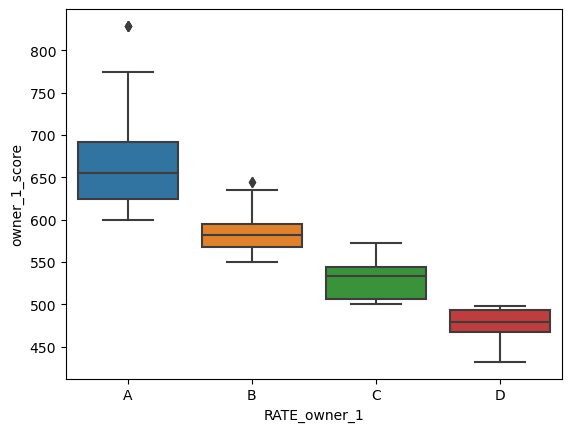

In [15]:
sns.boxplot(x='RATE_owner_1', y='owner_1_score', data=df)

Filling owner_1_score nulls with median 

In [16]:
df['owner_1_score'].fillna(df['owner_1_score'].median(), inplace=True)

In [17]:
def map_score(row, rate, score):
    if pd.isnull(row[rate]):
        if row[score] is not None:
            if row[score] > 650:
                return 'A'
            elif (row[score] > 550) and (row[score] < 630):
                return 'B'
            elif (row[score] > 500) and (row[score] < 550):
                return 'C'
            else:
                return 'D'
    else:
        return row[rate]

df['RATE_owner_1'] = df.apply(map_score, rate='RATE_owner_1', score='owner_1_score', axis=1)

<AxesSubplot:xlabel='RATE_owner_1', ylabel='owner_1_score'>

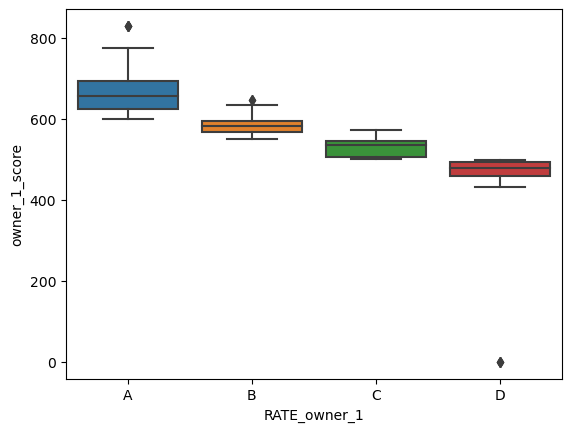

In [18]:
sns.boxplot(x='RATE_owner_1', y='owner_1_score', data=df) #after filling nulls with mapping to owner score 1

In [19]:
df['CAP_AMOUNT_owner_1'].value_counts()

150000.0    1071
100000.0     381
35000.0      251
0.0           72
Name: CAP_AMOUNT_owner_1, dtype: int64

<AxesSubplot:xlabel='RATE_owner_1', ylabel='CAP_AMOUNT_owner_1'>

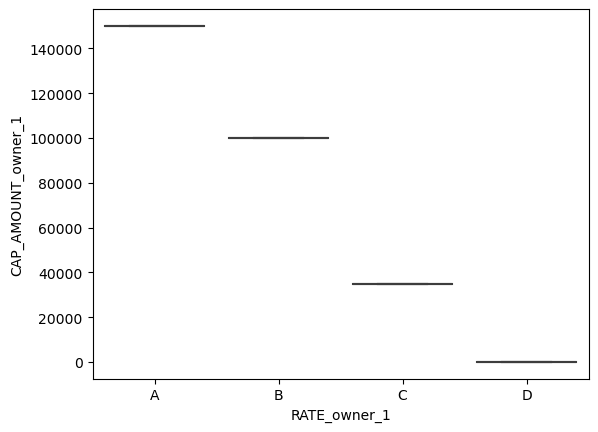

In [20]:
sns.boxplot(x='RATE_owner_1', y='CAP_AMOUNT_owner_1', data=df)

In [21]:
def map_cap(row, rate_col, cap_col, cap_map):
    rate_val = row[rate_col]
    cap_val = row[cap_col]

    if pd.notnull(cap_val):
        return pd.Series([rate_val, cap_val])
    elif pd.notnull(rate_val):
        cap_val = cap_map.get(rate_val, 0)
        return pd.Series([rate_val, cap_val])
    else:
        return pd.Series([rate_val, None])

cap_map = {'A': 150000, 'B': 100000, 'C': 40000, 'D': 0}
df[['RATE_owner_1', 'CAP_AMOUNT_owner_1']] = df.apply(map_cap, args=('RATE_owner_1', 'CAP_AMOUNT_owner_1', cap_map), axis=1, result_type='expand')

In [22]:
df['PERCENT_OWN_owner_1'].fillna(df['PERCENT_OWN_owner_1'].median(), inplace=True)

In [23]:
df.isnull().sum()

Unnamed: 0                                    0
id                                            0
owner_1_score                                 0
RATE_owner_1                                  0
CAP_AMOUNT_owner_1                            0
PERCENT_OWN_owner_1                           0
years_in_business                            16
RATE_ID_FOR_years_in_business                16
fsr                                         493
location                                     11
RATE_ID_FOR_location                         74
funded_last_30                                0
judgement_lien_percent                        0
RATE_ID_FOR_judgement_lien_percent            0
INPUT_VALUE_ID_FOR_judgement_lien_amount      0
RATE_ID_FOR_judgement_lien_amount             0
INPUT_VALUE_ID_FOR_num_negative_days          0
RATE_ID_FOR_num_negative_days                 2
INPUT_VALUE_ID_FOR_num_deposits               0
RATE_ID_FOR_num_deposits                      0
INPUT_VALUE_ID_FOR_monthly_gross        

In [24]:
df.drop(df[df['RATE_owner_4'] == 'R'].index, inplace=True)

In [25]:
df['INPUT_VALUE_owner_4'].fillna(df['INPUT_VALUE_owner_4'].median(), inplace=True)
df['PERCENT_OWN_owner_4'].fillna(df['PERCENT_OWN_owner_4'].median(), inplace=True)

In [26]:
df['RATE_owner_4'] = df.apply(map_score, rate='RATE_owner_4', score='INPUT_VALUE_owner_4', axis=1)

In [27]:
cap_map = {'A': 150000, 'B': 100000, 'C': 40000, 'D': 0}
df[['RATE_owner_4', 'CAP_AMOUNT_owner_4']] = df.apply(map_cap, args=('RATE_owner_4', 'CAP_AMOUNT_owner_4', cap_map), axis=1, result_type='expand')

<AxesSubplot:xlabel='years_in_business'>

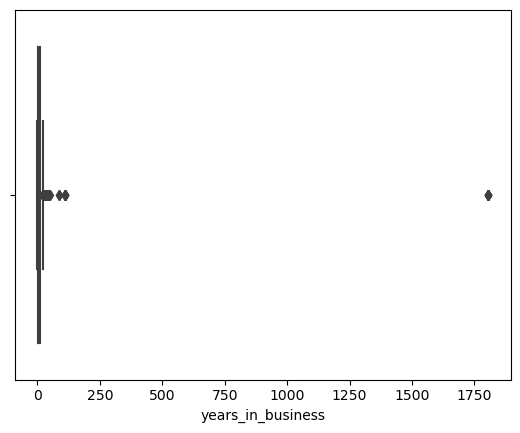

In [28]:
sns.boxplot(data=df,x='years_in_business')

In [29]:
df['RATE_ID_FOR_years_in_business'].value_counts()

A    1537
B     185
C      38
D      17
Name: RATE_ID_FOR_years_in_business, dtype: int64

In [30]:
df['years_in_business'].describe()

count    1777.000000
mean       18.337777
std       128.006839
min         0.030000
25%         3.060000
50%         5.710000
75%        11.430000
max      1805.400000
Name: years_in_business, dtype: float64

In [31]:
df['years_in_business'].fillna(df['years_in_business'].median(), inplace=True)

<AxesSubplot:xlabel='RATE_ID_FOR_years_in_business', ylabel='years_in_business'>

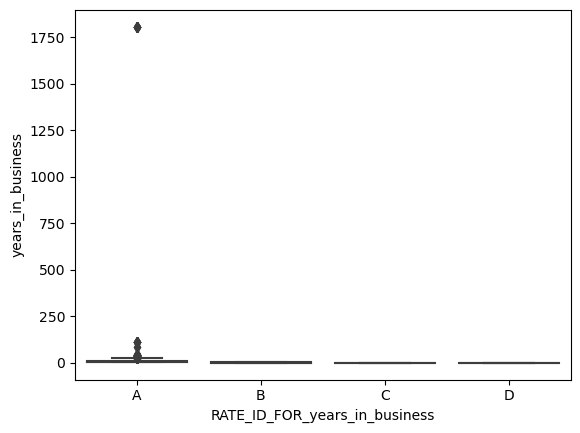

In [32]:
sns.boxplot(data=df,x='RATE_ID_FOR_years_in_business',y='years_in_business')

In [33]:
df['RATE_ID_FOR_years_in_business'].value_counts()

A    1537
B     185
C      38
D      17
Name: RATE_ID_FOR_years_in_business, dtype: int64

In [34]:
def map_years(row):
    if pd.isnull(row['RATE_ID_FOR_years_in_business']):
        if row['years_in_business'] is not None:
            if row['years_in_business'] > 10:
                return 'A'
            else:
                return 'B'

    else:
        return row['RATE_ID_FOR_years_in_business']

df['RATE_ID_FOR_years_in_business'] = df.apply(map_years, axis=1)

In [35]:
df['RATE_ID_FOR_years_in_business'].value_counts()

A    1537
B     201
C      38
D      17
Name: RATE_ID_FOR_years_in_business, dtype: int64

In [36]:
df.isnull().sum()

Unnamed: 0                                    0
id                                            0
owner_1_score                                 0
RATE_owner_1                                  0
CAP_AMOUNT_owner_1                            0
PERCENT_OWN_owner_1                           0
years_in_business                             0
RATE_ID_FOR_years_in_business                 0
fsr                                         493
location                                     11
RATE_ID_FOR_location                         70
funded_last_30                                0
judgement_lien_percent                        0
RATE_ID_FOR_judgement_lien_percent            0
INPUT_VALUE_ID_FOR_judgement_lien_amount      0
RATE_ID_FOR_judgement_lien_amount             0
INPUT_VALUE_ID_FOR_num_negative_days          0
RATE_ID_FOR_num_negative_days                 2
INPUT_VALUE_ID_FOR_num_deposits               0
RATE_ID_FOR_num_deposits                      0
INPUT_VALUE_ID_FOR_monthly_gross        

In [37]:
df['fsr'].describe()

count    1300.000000
mean       39.563077
std        31.873304
min         1.000000
25%         6.000000
50%        29.000000
75%        73.250000
max        99.000000
Name: fsr, dtype: float64

In [38]:
df['fsr'].fillna(df['fsr'].median(),inplace=True)

<AxesSubplot:xlabel='location', ylabel='count'>

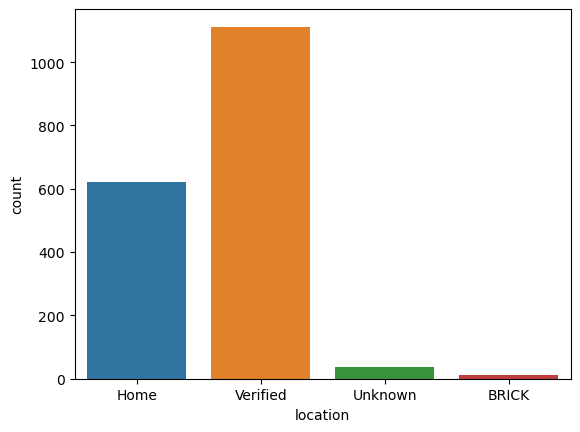

In [39]:
sns.countplot(data=df,x='location')

In [40]:
df['location'].value_counts()

Verified    1112
Home         621
Unknown       36
BRICK         13
Name: location, dtype: int64

In [41]:
df['location']=df['location'].fillna('Unknown')

In [42]:
df['RATE_ID_FOR_location'].value_counts()

A    1723
Name: RATE_ID_FOR_location, dtype: int64

<AxesSubplot:xlabel='location', ylabel='count'>

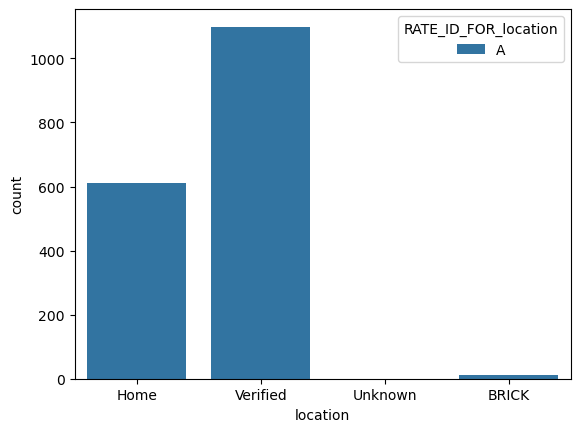

In [43]:
sns.countplot(data=df,x='location',hue='RATE_ID_FOR_location')

In [44]:
def map_location(row):
    if row['location'] is not None:
        if row['location'] == 'Verified':
            return 'A'
        elif row['location'] == 'Home':
            return 'B'
        elif row['location'] == 'BRICK':
            return 'C'
        else:
            return 'D'
    else:
        return row['RATE_ID_FOR_location']

df['RATE_ID_FOR_location'] = df.apply(map_location, axis=1)

In [45]:
df.shape

(1793, 42)

In [46]:
df.isnull().sum()

Unnamed: 0                                   0
id                                           0
owner_1_score                                0
RATE_owner_1                                 0
CAP_AMOUNT_owner_1                           0
PERCENT_OWN_owner_1                          0
years_in_business                            0
RATE_ID_FOR_years_in_business                0
fsr                                          0
location                                     0
RATE_ID_FOR_location                         0
funded_last_30                               0
judgement_lien_percent                       0
RATE_ID_FOR_judgement_lien_percent           0
INPUT_VALUE_ID_FOR_judgement_lien_amount     0
RATE_ID_FOR_judgement_lien_amount            0
INPUT_VALUE_ID_FOR_num_negative_days         0
RATE_ID_FOR_num_negative_days                2
INPUT_VALUE_ID_FOR_num_deposits              0
RATE_ID_FOR_num_deposits                     0
INPUT_VALUE_ID_FOR_monthly_gross             0
RATE_ID_FOR_m

<AxesSubplot:xlabel='RATE_ID_FOR_tax_lien_count', ylabel='INPUT_VALUE_ID_FOR_tax_lien_count'>

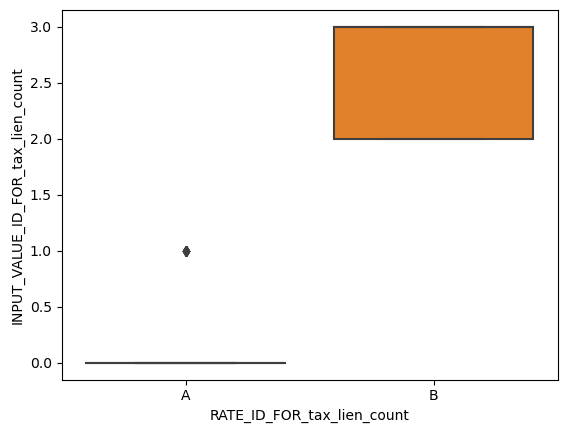

In [47]:
sns.boxplot(data=df,x='RATE_ID_FOR_tax_lien_count',y='INPUT_VALUE_ID_FOR_tax_lien_count')

In [48]:
df['INPUT_VALUE_ID_FOR_tax_lien_count'].value_counts()

0.0    1765
1.0      10
3.0       4
2.0       3
Name: INPUT_VALUE_ID_FOR_tax_lien_count, dtype: int64

In [49]:
df['INPUT_VALUE_ID_FOR_tax_lien_count'].fillna(df['INPUT_VALUE_ID_FOR_tax_lien_count'].median(),inplace=True)

In [50]:
df['RATE_ID_FOR_tax_lien_count'].value_counts()

A    1775
B       7
Name: RATE_ID_FOR_tax_lien_count, dtype: int64

In [51]:
def map_tax(row):
    if row['INPUT_VALUE_ID_FOR_tax_lien_count'] is not None:
        if row['INPUT_VALUE_ID_FOR_tax_lien_count'] ==0:
            return 'A'
        elif row['INPUT_VALUE_ID_FOR_tax_lien_count'] >0:
            return 'B'
    else:
        return row['RATE_ID_FOR_tax_lien_count']

df['RATE_ID_FOR_tax_lien_count'] = df.apply(map_tax, axis=1)

In [52]:
df['RATE_ID_FOR_num_negative_days'].value_counts()

A    1509
C     134
B     100
D      48
Name: RATE_ID_FOR_num_negative_days, dtype: int64

In [53]:
df['RATE_ID_FOR_num_negative_days']=df['RATE_ID_FOR_num_negative_days'].fillna(df['RATE_ID_FOR_num_negative_days'].mode().iloc[0])

<AxesSubplot:xlabel='RATE_ID_FOR_current_position', ylabel='INPUT_VALUE_ID_FOR_current_position'>

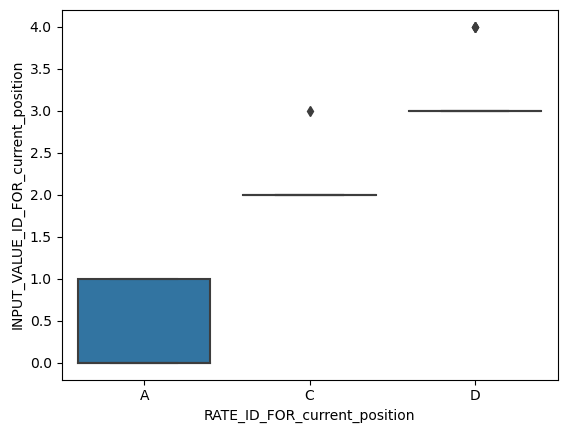

In [54]:
sns.boxplot(data=df,x='RATE_ID_FOR_current_position',y='INPUT_VALUE_ID_FOR_current_position')

In [55]:
df['RATE_ID_FOR_current_position'].value_counts()

A    1473
C     282
D      24
Name: RATE_ID_FOR_current_position, dtype: int64

In [56]:
df['INPUT_VALUE_ID_FOR_current_position'].value_counts()

0.0    839
1.0    634
2.0    281
3.0     22
4.0      3
Name: INPUT_VALUE_ID_FOR_current_position, dtype: int64

In [57]:
df['INPUT_VALUE_ID_FOR_current_position'].fillna(df['INPUT_VALUE_ID_FOR_current_position'].median(),inplace=True)
df['RATE_ID_FOR_current_position']=df['RATE_ID_FOR_current_position'].fillna(df['RATE_ID_FOR_current_position'].mode().iloc[0])

<AxesSubplot:xlabel='INPUT_VALUE_ID_FOR_avg_net_deposits'>

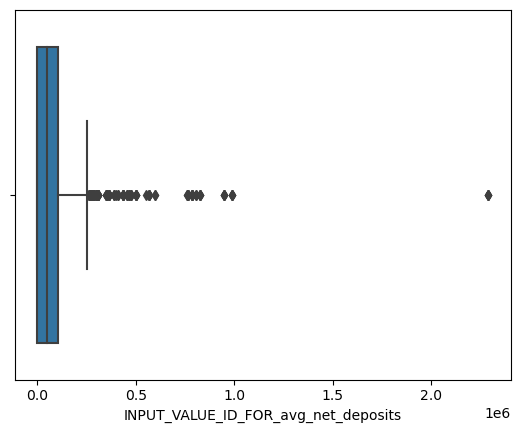

In [58]:
sns.boxplot(data=df,x='INPUT_VALUE_ID_FOR_avg_net_deposits')        

In [59]:
df['INPUT_VALUE_ID_FOR_avg_net_deposits'].describe()

count    1.786000e+03
mean     8.979892e+04
std      1.674450e+05
min      0.000000e+00
25%      0.000000e+00
50%      4.789875e+04
75%      1.036317e+05
max      2.291481e+06
Name: INPUT_VALUE_ID_FOR_avg_net_deposits, dtype: float64

In [60]:
df['INPUT_VALUE_ID_FOR_avg_net_deposits'].fillna(df['INPUT_VALUE_ID_FOR_avg_net_deposits'].median(),inplace=True)

<AxesSubplot:xlabel='INPUT_VALUE_ID_FOR_industry_type', ylabel='count'>

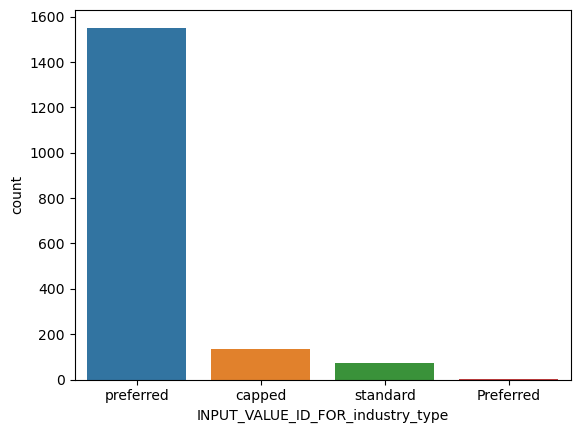

In [61]:
sns.countplot(data=df,x='INPUT_VALUE_ID_FOR_industry_type')

In [62]:
df['INPUT_VALUE_ID_FOR_industry_type'].value_counts()

preferred    1552
capped        134
standard       75
Preferred       2
Name: INPUT_VALUE_ID_FOR_industry_type, dtype: int64

In [63]:
df['INPUT_VALUE_ID_FOR_industry_type']=df['INPUT_VALUE_ID_FOR_industry_type'].replace('Preferred','preferred')

In [64]:
df.isnull().sum()

Unnamed: 0                                   0
id                                           0
owner_1_score                                0
RATE_owner_1                                 0
CAP_AMOUNT_owner_1                           0
PERCENT_OWN_owner_1                          0
years_in_business                            0
RATE_ID_FOR_years_in_business                0
fsr                                          0
location                                     0
RATE_ID_FOR_location                         0
funded_last_30                               0
judgement_lien_percent                       0
RATE_ID_FOR_judgement_lien_percent           0
INPUT_VALUE_ID_FOR_judgement_lien_amount     0
RATE_ID_FOR_judgement_lien_amount            0
INPUT_VALUE_ID_FOR_num_negative_days         0
RATE_ID_FOR_num_negative_days                0
INPUT_VALUE_ID_FOR_num_deposits              0
RATE_ID_FOR_num_deposits                     0
INPUT_VALUE_ID_FOR_monthly_gross             0
RATE_ID_FOR_m

In [65]:
df['INPUT_VALUE_ID_FOR_industry_type']=df['INPUT_VALUE_ID_FOR_industry_type'].fillna(df['INPUT_VALUE_ID_FOR_industry_type'].mode().iloc[0])

# Feature Selection

Encoding categorical data

In [66]:
def encode(df):
    for col in df.columns:
        if df[col].dtypes == 'object':         
            encoder = preprocessing.LabelEncoder()         
            df[col] = encoder.fit_transform(df[col])
    return df

df=encode(df)

Using feature selection models:

In [67]:
# df.drop('deal_application_thread_id',axis=1,inplace=True)
# df.drop('id',axis=1,inplace=True)

In [68]:
X = df.drop('completion_status', axis=1)
y = df['completion_status'] 

[4.11891319e-03 6.97803867e-02 1.09698817e-01 2.32637535e-03
 1.48772465e-03 2.52618294e-02 1.73147610e-01 6.62220723e-03
 1.05768760e-01 4.48213028e-05 4.79399350e-03 0.00000000e+00
 0.00000000e+00 4.17778393e-04 2.48685616e-04 0.00000000e+00
 2.77881662e-02 1.05957581e-04 3.79219881e-02 1.55879778e-03
 3.94698077e-02 2.15362228e-06 3.05256747e-02 2.53190036e-05
 1.85495493e-02 6.82611502e-05 9.12611587e-04 0.00000000e+00
 3.57416620e-04 0.00000000e+00 5.81832013e-04 9.99108971e-07
 5.06548032e-03 1.94630682e-03 3.45604320e-02 6.85213981e-04
 7.44463642e-02 2.49914243e-03 1.33389198e-03 3.69690489e-04
 2.17507041e-01]


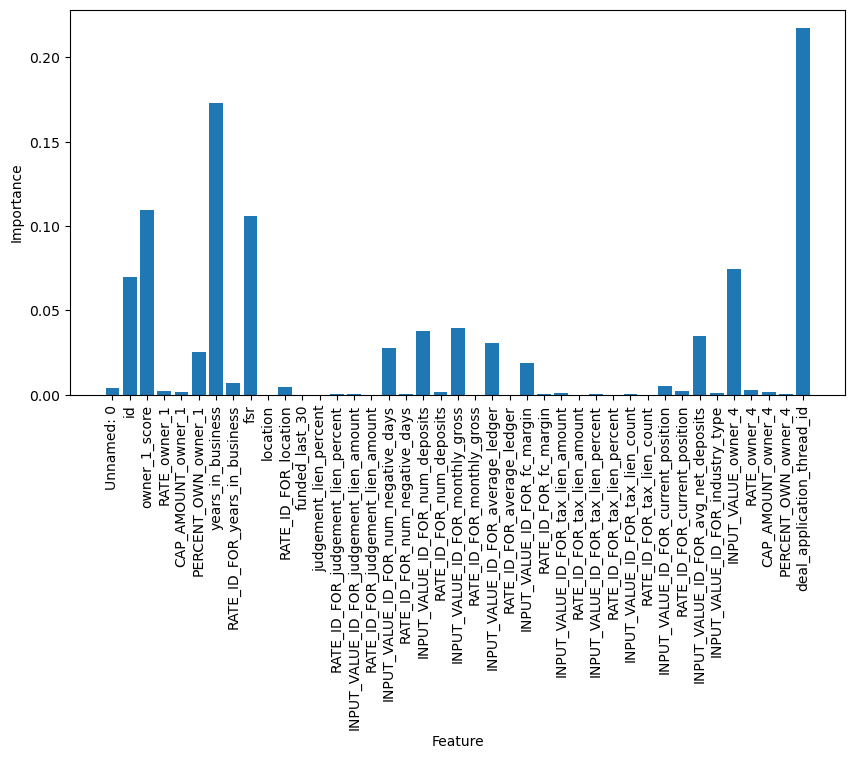

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X, y)

importances = gb.feature_importances_
print(importances)

plt.figure(figsize=(10,5))
plt.bar(range(X.shape[1]), importances)
plt.xticks(range(X.shape[1]), df.columns[:-1], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

[2.29615645e-02 7.80784423e-02 1.42021322e-01 3.77665421e-03
 4.68800170e-03 6.84517794e-03 1.35557358e-01 5.84433791e-03
 8.01023271e-02 2.03976379e-03 2.19077477e-03 2.26483686e-05
 1.85608457e-04 4.41158205e-05 2.02405937e-04 5.35844455e-05
 3.28883474e-02 2.65955912e-03 4.58213556e-02 3.55328463e-03
 3.78500971e-02 6.37000999e-04 5.30529835e-02 8.03685186e-04
 3.12681580e-02 4.59489969e-04 1.60379559e-04 0.00000000e+00
 9.33709282e-05 0.00000000e+00 1.27342265e-04 1.30605455e-04
 4.44640143e-03 1.26982742e-03 3.72170292e-02 1.90812880e-03
 9.68972947e-02 3.75272368e-03 3.31751314e-03 4.74626470e-03
 1.52325070e-01]


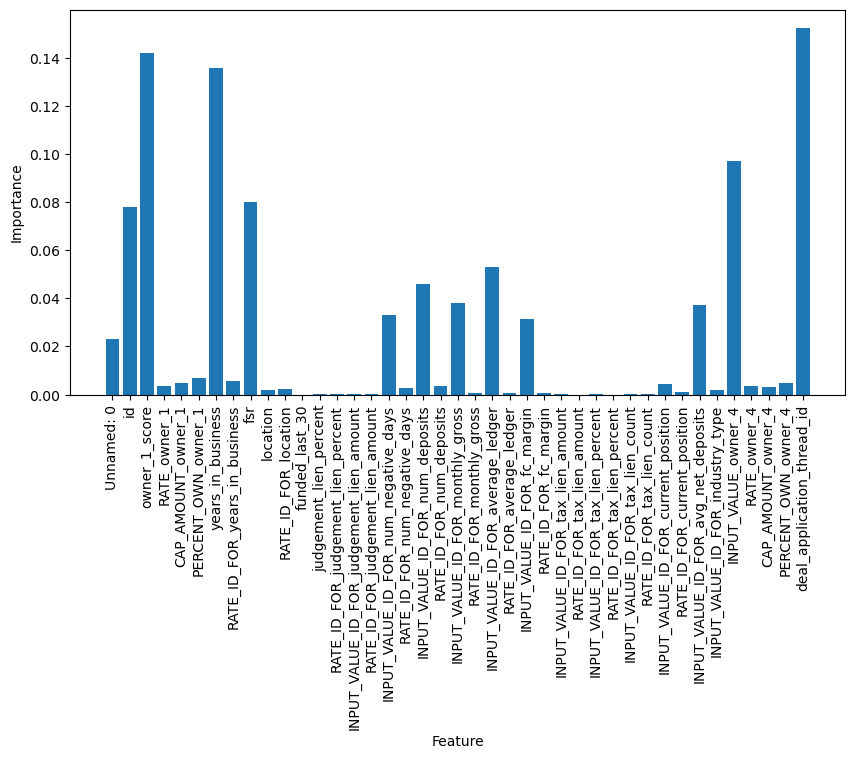

In [70]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

importances = rf.feature_importances_
print(importances)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(X.shape[1]), importances)
plt.xticks(range(X.shape[1]), df.columns[:-1], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [71]:
list_f=['owner_1_score','years_in_business','INPUT_VALUE_owner_4','INPUT_VALUE_ID_FOR_avg_net_deposits','INPUT_VALUE_ID_FOR_fc_margin','INPUT_VALUE_ID_FOR_average_ledger','INPUT_VALUE_ID_FOR_monthly_gross','INPUT_VALUE_ID_FOR_num_deposits','INPUT_VALUE_ID_FOR_num_negative_days','fsr']

In [72]:
df.dtypes

Unnamed: 0                                    int64
id                                            int64
owner_1_score                               float64
RATE_owner_1                                  int32
CAP_AMOUNT_owner_1                          float64
PERCENT_OWN_owner_1                         float64
years_in_business                           float64
RATE_ID_FOR_years_in_business                 int32
fsr                                         float64
location                                      int32
RATE_ID_FOR_location                          int32
funded_last_30                                int32
judgement_lien_percent                      float64
RATE_ID_FOR_judgement_lien_percent            int32
INPUT_VALUE_ID_FOR_judgement_lien_amount    float64
RATE_ID_FOR_judgement_lien_amount             int32
INPUT_VALUE_ID_FOR_num_negative_days        float64
RATE_ID_FOR_num_negative_days                 int32
INPUT_VALUE_ID_FOR_num_deposits             float64
RATE_ID_FOR_

In [73]:
# list_f=['years_in_business', 'INPUT_VALUE_owner_4', 'owner_1_score','INPUT_VALUE_ID_FOR_average_ledger','INPUT_VALUE_ID_FOR_monthly_gross','INPUT_VALUE_ID_FOR_avg_net_deposits','INPUT_VALUE_ID_FOR_num_deposits']

# Models

Gradient Boosting Classifier

In [74]:
X_selected= df[list_f]
y = df['completion_status']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

Oversampling the data to deal with class imbalances:

In [76]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({1: 683, 2: 683, 0: 683, 3: 683})


Normalizing the data:

In [77]:
from sklearn.preprocessing import RobustScaler  # ahsan mn el standard scaler wel min max scaler 3shan da byt3amel m3 el data el imbalanced ahsan

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled, y_resampled)

accuracy = gbc.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8022284122562674


DecisionTree Classifier

In [79]:
X_selected2= df[list_f]
y2 = df['completion_status']

In [80]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected2, y2, test_size=0.2)

In [81]:
ros2 = RandomOverSampler()
X_resampled2, y_resampled2 = ros2.fit_resample(X_train2, y_train2)

print('Resampled dataset shape %s' % Counter(y_resampled2))

Resampled dataset shape Counter({0: 681, 3: 681, 2: 681, 1: 681})


In [82]:
from sklearn.preprocessing import RobustScaler

scaler2 = RobustScaler()
X_train_scaled2 = scaler2.fit_transform(X_resampled2)
X_test_scaled2 = scaler2.transform(X_test2)

In [83]:
X_train_scaled2.shape

(2724, 10)

Cross-validation scores: [0.93944954 0.93211009 0.93394495 0.93761468 0.97610294]
Average cross-validation score: 0.9438444414463033
Test set accuracy: 0.8969359331476323
Test set precision: 0.8989713600821655
Test set recall: 0.8969359331476323
Test set F1 score: 0.8975014129139457


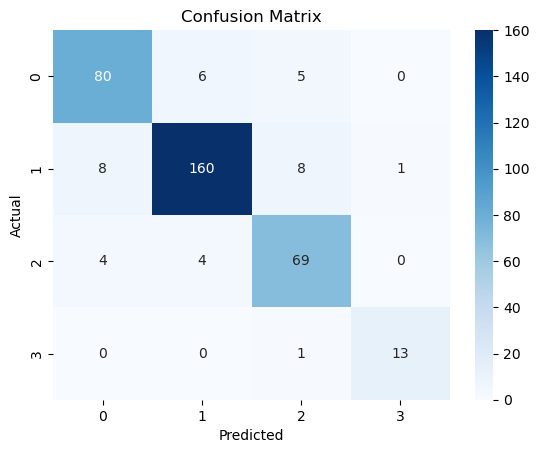

In [84]:
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled2, y_resampled2)
y_pred2 = clf.predict(X_test_scaled2)

cv_scores2 = cross_val_score(clf, X_train_scaled2, y_resampled2, cv=5)

accuracy2 = accuracy_score(y_test2, y_pred2)
precision2 = precision_score(y_test2, y_pred2, average='weighted')
recall2 = recall_score(y_test2, y_pred2, average='weighted')
f12 = f1_score(y_test2, y_pred2, average='weighted')
cm2 = confusion_matrix(y_test2, y_pred2)

print('Cross-validation scores:', cv_scores2)
print('Average cross-validation score:', cv_scores2.mean())
print('Test set accuracy:', accuracy2)
print('Test set precision:', precision2)
print('Test set recall:', recall2)
print('Test set F1 score:', f12)

sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

RandomForest model

In [85]:
X_selected3= df[list_f]
y3 = df['completion_status']

In [86]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_selected3, y3, test_size=0.2)

In [87]:
ros3 = RandomOverSampler()
X_resampled3, y_resampled3 = ros3.fit_resample(X_train3, y_train3)

print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({1: 683, 2: 683, 0: 683, 3: 683})


In [88]:
from sklearn.preprocessing import RobustScaler

scaler3 = RobustScaler()
X_train_scaled3 = scaler3.fit_transform(X_resampled3)
X_test_scaled3 = scaler3.transform(X_test3)

Hyperparameter tuning RandomForest model

In [89]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

param_dist = {
    'n_estimators': randint(10, 500), 
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy',  n_jobs=-1)
random_search.fit(X_train_scaled3, y_resampled3)

print('Best hyperparameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

y_pred3 = random_search.predict(X_test_scaled3)
test_accuracy3 = accuracy_score(y_test3, y_pred3)
print('Test accuracy:', test_accuracy3)

Best hyperparameters: {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 473}
Best score: 0.963868613138686
Test accuracy: 0.8913649025069638


Cross-validation scores: [0.95985401 0.96532847 0.95985401 0.97080292 0.9689781 ]
Average cross-validation score: 0.9649635036496349
Test set accuracy: 0.9025069637883009
Test set precision: 0.9023281840754924
Test set recall: 0.9025069637883009
Test set F1 score: 0.9020430574284594


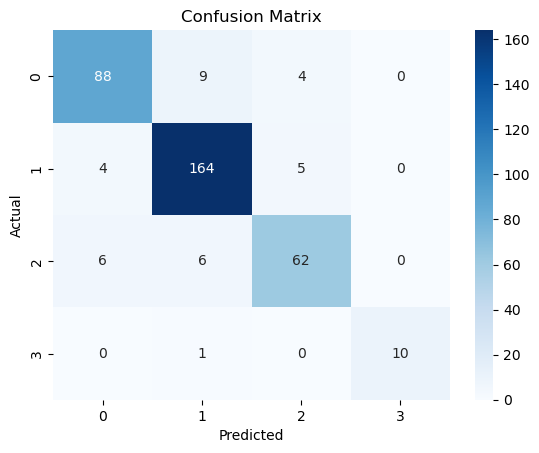

In [90]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=47, bootstrap=True, max_features='log2')
cv_scores3 = cross_val_score(rf, X_train_scaled3, y_resampled3, cv=5)
rf.fit(X_train_scaled3, y_resampled3)
y_pred3 = rf.predict(X_test_scaled3)
accuracy3 = accuracy_score(y_test3, y_pred3)
precision3 = precision_score(y_test3, y_pred3, average='weighted')
recall3 = recall_score(y_test3, y_pred3, average='weighted')
f13 = f1_score(y_test3, y_pred3, average='weighted')
cm3 = confusion_matrix(y_test3, y_pred3)

print('Cross-validation scores:', cv_scores3)
print('Average cross-validation score:', cv_scores3.mean())
print('Test set accuracy:', accuracy3)
print('Test set precision:', precision3)
print('Test set recall:', recall3)
print('Test set F1 score:', f13)

sns.heatmap(cm3, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [91]:
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, val_scores = learning_curve(
#     rf, X_train_scaled3, y_resampled3, cv=5, scoring='neg_mean_squared_error', 
#     n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# train_loss_mean = -np.mean(train_scores, axis=1)
# val_loss_mean = -np.mean(val_scores, axis=1)

# plt.plot(train_sizes, train_loss_mean, label='Training loss')
# plt.plot(train_sizes, val_loss_mean, label='Validation loss')
# plt.xlabel('Training set size')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

Ensemble Model

In [92]:
X_selected4= df[list_f]
y4 = df['completion_status']

In [93]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_selected4, y4, test_size=0.2)

In [94]:
ros4 = RandomOverSampler()
X_resampled4, y_resampled4 = ros4.fit_resample(X_train4, y_train4)

print('Resampled dataset shape %s' % Counter(y_resampled4))

Resampled dataset shape Counter({1: 682, 3: 682, 0: 682, 2: 682})


In [95]:
from sklearn.preprocessing import RobustScaler

scaler4 = RobustScaler()
X_train_scaled4 = scaler4.fit_transform(X_resampled4)
X_test_scaled4 = scaler4.transform(X_test4)

Cross-validation scores: [0.94139194 0.95421245 0.95238095 0.95963303 0.97981651]
Average cross-validation score: 0.9574869778539503
Test set accuracy: 0.9526462395543176
Test set precision: 0.9527899030141466
Test set recall: 0.9526462395543176
Test set F1 score: 0.9524717080200852
Confusion matrix: [[ 96   3   0   0]
 [  2 170   4   0]
 [  0   8  65   0]
 [  0   0   0  11]]


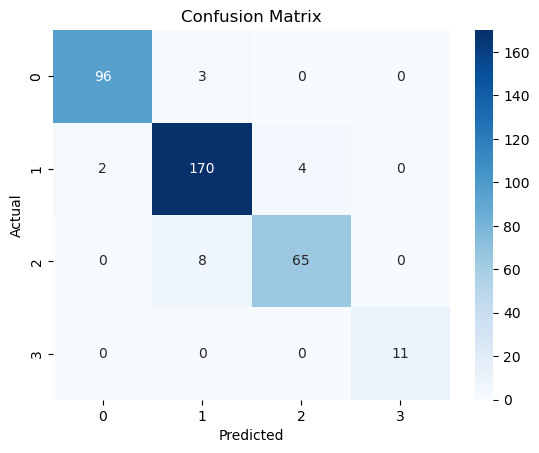

In [96]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
dst_clf = DecisionTreeClassifier()


ensemble_model = VotingClassifier(estimators=[('rf', rf_clf), ('gb', gb_clf),('dst',dst_clf)], voting='hard')
ensemble_model.fit(X_train_scaled4, y_resampled4)
y_pred4 = ensemble_model.predict(X_test_scaled4)

cv_scores4 = cross_val_score(ensemble_model, X_train_scaled4, y_resampled4, cv=5)
accuracy4 = accuracy_score(y_test4, y_pred4)
precision4 = precision_score(y_test4, y_pred4, average='weighted')
recall4 = recall_score(y_test4, y_pred4, average='weighted')
f14= f1_score(y_test4, y_pred4, average='weighted')
cm4 = confusion_matrix(y_test4, y_pred4)

print('Cross-validation scores:', cv_scores4)
print('Average cross-validation score:', cv_scores4.mean())
print('Test set accuracy:', accuracy4)
print('Test set precision:', precision4)
print('Test set recall:', recall4)
print('Test set F1 score:', f14)
print('Confusion matrix:', cm4)

sns.heatmap(cm4, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test Script

In [97]:
test = pd.read_csv('test.csv')

In [98]:
def test_pp(test):
    
    test=drop_null_columns(test)

    test['owner_1_score'].fillna(test['owner_1_score'].median(), inplace=True)

    test['RATE_owner_1'] = test.apply(map_score, rate='RATE_owner_1', score='owner_1_score', axis=1)

    cap_map = {'A': 150000, 'B': 100000, 'C': 40000, 'D': 0}
    test[['RATE_owner_1', 'CAP_AMOUNT_owner_1']] = test.apply(map_cap, args=('RATE_owner_1', 'CAP_AMOUNT_owner_1', cap_map), axis=1, result_type='expand')

    test['PERCENT_OWN_owner_1'].fillna(test['PERCENT_OWN_owner_1'].median(), inplace=True)

    test['INPUT_VALUE_owner_4'].fillna(test['INPUT_VALUE_owner_4'].median(), inplace=True)
    test['PERCENT_OWN_owner_4'].fillna(test['PERCENT_OWN_owner_4'].median(), inplace=True)

    test['RATE_owner_4'] = test.apply(map_score, rate='RATE_owner_4', score='INPUT_VALUE_owner_4', axis=1)

    cap_map = {'A': 150000, 'B': 100000, 'C': 40000, 'D': 0}
    test[['RATE_owner_4', 'CAP_AMOUNT_owner_4']] = test.apply(map_cap, args=('RATE_owner_4', 'CAP_AMOUNT_owner_4', cap_map), axis=1, result_type='expand')

    test['years_in_business'].fillna(test['years_in_business'].median(), inplace=True)

    test['RATE_ID_FOR_years_in_business'] = test.apply(map_years, axis=1)

    test['fsr'].fillna(test['fsr'].median(),inplace=True)

    test['location']=test['location'].fillna('Unknown')

    test['RATE_ID_FOR_location'] = test.apply(map_location, axis=1)

    test['INPUT_VALUE_ID_FOR_tax_lien_count'].fillna(test['INPUT_VALUE_ID_FOR_tax_lien_count'].median(),inplace=True)

    test['RATE_ID_FOR_tax_lien_count'] = test.apply(map_tax, axis=1)


    test['RATE_ID_FOR_num_negative_days']=test['RATE_ID_FOR_num_negative_days'].fillna(test['RATE_ID_FOR_num_negative_days'].mode().iloc[0])

    test['INPUT_VALUE_ID_FOR_current_position'].fillna(test['INPUT_VALUE_ID_FOR_current_position'].median(),inplace=True)
    test['RATE_ID_FOR_current_position']=test['RATE_ID_FOR_current_position'].fillna(test['RATE_ID_FOR_current_position'].mode().iloc[0])

    test['INPUT_VALUE_ID_FOR_avg_net_deposits'].fillna(test['INPUT_VALUE_ID_FOR_avg_net_deposits'].median(),inplace=True)

    test['INPUT_VALUE_ID_FOR_industry_type']=test['INPUT_VALUE_ID_FOR_industry_type'].replace('Preferred','preferred')

    test['INPUT_VALUE_ID_FOR_industry_type']=test['INPUT_VALUE_ID_FOR_industry_type'].fillna(test['INPUT_VALUE_ID_FOR_industry_type'].mode().iloc[0])

    test=encode(test)
    return test
    

In [99]:
test=test_pp(test)

In [100]:
test

,Unnamed: 0,id,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,years_in_business,RATE_ID_FOR_years_in_business,fsr,location,...,INPUT_VALUE_ID_FOR_current_position,RATE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
0,332,1971,505.0,2,35000.0,100.0,6.84,0,28.5,0,...,0.0,0,1.091060e+05,1,505.0,2,35000.0,100.0,1977.0,2
1,1837,7184,598.0,1,100000.0,100.0,6.77,0,92.0,2,...,1.0,0,1.539107e+05,1,598.0,1,100000.0,100.0,4538.0,1
2,428,2052,690.0,0,150000.0,33.3,30.28,0,80.0,2,...,1.0,0,3.914812e+05,1,703.0,0,150000.0,66.6,2131.0,0
3,1740,6384,672.0,0,150000.0,100.0,2.38,0,37.0,2,...,2.0,1,1.456024e+05,1,672.0,0,150000.0,100.0,5598.0,2
4,195,1112,634.0,0,150000.0,100.0,6.80,0,86.0,2,...,1.0,0,2.244500e+04,2,634.0,0,150000.0,100.0,765.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1878,8495,561.0,2,35000.0,100.0,1.69,1,1.0,2,...,2.0,1,2.723420e+05,1,561.0,2,35000.0,100.0,7256.0,0
198,202,751,620.0,0,150000.0,100.0,8.19,0,28.5,2,...,1.0,0,1.305513e+05,1,620.0,0,150000.0,100.0,153.0,2
199,233,1126,736.0,0,150000.0,100.0,20.81,0,99.0,2,...,3.0,2,2.988232e+05,1,736.0,0,150000.0,100.0,1053.0,0
200,707,3879,638.0,0,150000.0,100.0,6.79,0,5.0,0,...,0.0,0,0.000000e+00,1,638.0,0,150000.0,100.0,3934.0,0


In [101]:
X_selected8= df[list_f]
y_train8 = df['completion_status']
X_selected_test=test[list_f]
y_test8=test['completion_status']

In [102]:
ros8 = RandomOverSampler()
X_resampled8, y_resampled8 = ros8.fit_resample(X_selected8, y_train8)

print('Resampled dataset shape %s' % Counter(y_resampled8))

Resampled dataset shape Counter({2: 858, 1: 858, 0: 858, 3: 858})


Normalizing the data:

In [103]:
from sklearn.preprocessing import RobustScaler  # ahsan mn el standard scaler wel min max scaler 3shan da byt3amel m3 el data el imbalanced ahsan

scaler8 = RobustScaler()
X_train_scaled8 = scaler8.fit_transform(X_resampled8)
X_test_scaled8 = scaler8.transform(X_selected_test)

Gradient Boost

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

gbc8 = GradientBoostingClassifier()
gbc8.fit(X_train_scaled8, y_resampled8)

accuracy = gbc8.score(X_test_scaled8, y_test8)
print("Accuracy:", accuracy)

Accuracy: 0.8366336633663366


Random Forest

In [105]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

param_dist = {
    'n_estimators': randint(10, 500), 
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True, False]
}

rf9 = RandomForestClassifier()
random_search9 = RandomizedSearchCV(estimator=rf9, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy',  n_jobs=-1)
random_search9.fit(X_train_scaled8, y_resampled8)

print('Best hyperparameters:', random_search9.best_params_)
print('Best score:', random_search9.best_score_)

y_pred9 = random_search9.predict(X_test_scaled8)
test_accuracy9= accuracy_score(y_test8, y_pred9)
print('Test accuracy:', test_accuracy9)

Best hyperparameters: {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 433}
Best score: 0.9726159709048934
Test accuracy: 0.9405940594059405


Cross-validation scores: [0.95924309 0.9650655  0.96793003 0.98104956 0.98104956]
Average cross-validation score: 0.9708675485165996
Test set accuracy: 0.9356435643564357
Test set precision: 0.934802874122404
Test set recall: 0.9356435643564357
Test set F1 score: 0.9337606554773125


C:\Users\Marwan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


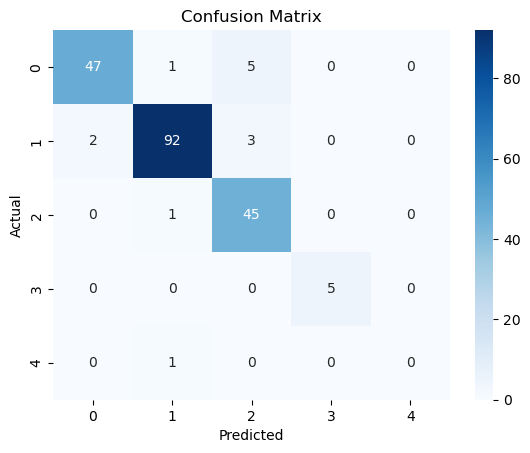

In [106]:
from sklearn.model_selection import cross_val_score

rf8 = RandomForestClassifier(n_estimators=455, bootstrap=False, max_features='sqrt')
cv_scores8 = cross_val_score(rf8, X_train_scaled8, y_resampled8, cv=5)
rf8.fit(X_train_scaled8, y_resampled8)
y_pred8 = rf8.predict(X_test_scaled8)
accuracy8 = accuracy_score(y_test8, y_pred8)
precision8 = precision_score(y_test8, y_pred8, average='weighted')
recall8 = recall_score(y_test8, y_pred8, average='weighted')
f18 = f1_score(y_test8, y_pred8, average='weighted')
cm8 = confusion_matrix(y_test8, y_pred8)

print('Cross-validation scores:', cv_scores8)
print('Average cross-validation score:', cv_scores8.mean())
print('Test set accuracy:', accuracy8)
print('Test set precision:', precision8)
print('Test set recall:', recall8)
print('Test set F1 score:', f18)

sns.heatmap(cm8, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree

Cross-validation scores: [0.94905386 0.95778748 0.96501458 0.97667638 0.96793003]
Average cross-validation score: 0.9632924660818789
Test set accuracy: 0.905940594059406
Test set precision: 0.9045903659844893
Test set recall: 0.905940594059406
Test set F1 score: 0.9042950374521878


C:\Users\Marwan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


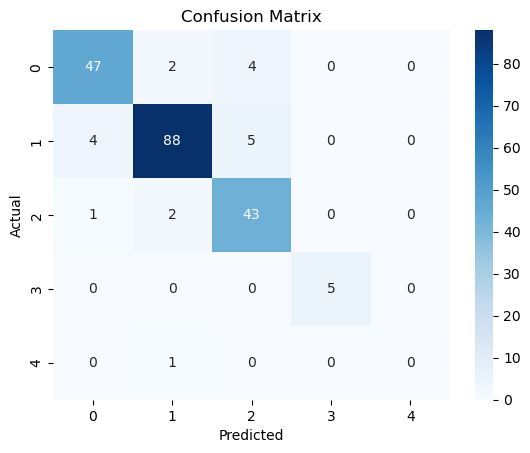

In [107]:
clf9 = DecisionTreeClassifier()
clf9.fit(X_train_scaled8, y_resampled8)
y_pred9 = clf9.predict(X_test_scaled8)

cv_scores9 = cross_val_score(clf9, X_train_scaled8, y_resampled8, cv=5)

accuracy9 = accuracy_score(y_test8, y_pred9)
precision9 = precision_score(y_test8, y_pred9, average='weighted')
recall9 = recall_score(y_test8, y_pred9, average='weighted')
f19 = f1_score(y_test8, y_pred9, average='weighted')
cm9 = confusion_matrix(y_test8, y_pred9)

print('Cross-validation scores:', cv_scores9)
print('Average cross-validation score:', cv_scores9.mean())
print('Test set accuracy:', accuracy9)
print('Test set precision:', precision9)
print('Test set recall:', recall9)
print('Test set F1 score:', f19)

sns.heatmap(cm9, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Ensemble Model

Cross-validation scores: [0.95342067 0.96069869 0.97084548 0.97959184 0.97376093]
Average cross-validation score: 0.9676635220526139
Test set accuracy: 0.9158415841584159
Test set precision: 0.9151425820583302
Test set recall: 0.9158415841584159
Test set F1 score: 0.9139935270122758
Confusion matrix: [[47  2  4  0  0]
 [ 5 88  4  0  0]
 [ 0  1 45  0  0]
 [ 0  0  0  5  0]
 [ 1  0  0  0  0]]


C:\Users\Marwan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


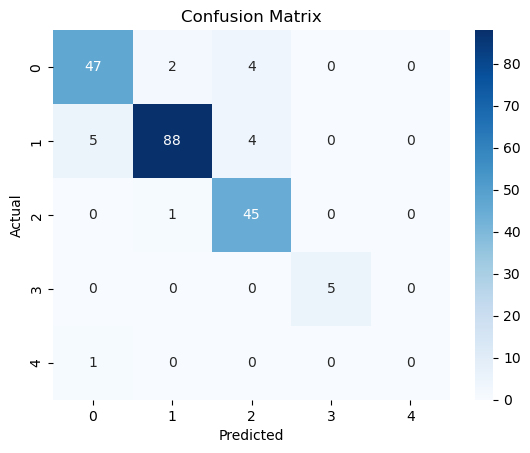

In [108]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rf_clf9 = RandomForestClassifier()
gb_clf9 = GradientBoostingClassifier()
dst_clf9 = DecisionTreeClassifier()


ensemble_model9 = VotingClassifier(estimators=[('rf', rf_clf9), ('gb', gb_clf9),('dst',dst_clf9)], voting='hard')
ensemble_model9.fit(X_train_scaled8, y_resampled8)
y_pred10 = ensemble_model9.predict(X_test_scaled8)

cv_scores10 = cross_val_score(ensemble_model9, X_train_scaled8, y_resampled8, cv=5)
accuracy10 = accuracy_score(y_test8, y_pred10)
precision10 = precision_score(y_test8, y_pred10, average='weighted')
recall10 = recall_score(y_test8, y_pred10, average='weighted')
f110= f1_score(y_test8, y_pred10, average='weighted')
cm10 = confusion_matrix(y_test8, y_pred10)

print('Cross-validation scores:', cv_scores10)
print('Average cross-validation score:', cv_scores10.mean())
print('Test set accuracy:', accuracy10)
print('Test set precision:', precision10)
print('Test set recall:', recall10)
print('Test set F1 score:', f110)
print('Confusion matrix:', cm10)

sns.heatmap(cm10, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()